# 5.1 Fitting a regression line to the student debt data

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

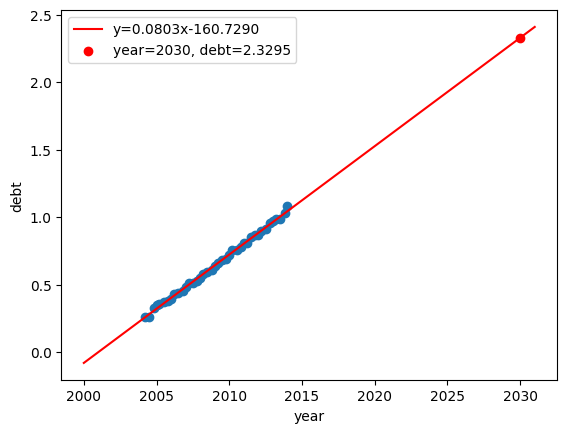

In [32]:
data = pd.read_csv('student_debt_data.csv', header=None)
data = data.to_numpy()
x = data[:,0].reshape(-1,1)
y = data[:,1].reshape(-1,1)
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
plt.scatter(x,y)
x_seq = np.linspace(2000,2031,1000)
coef = model.coef_[0][0]
intercept = model.intercept_[0]
y_seq = coef * x_seq + intercept
plt.plot(x_seq, y_seq, color='r', label = f"y={model.coef_[0][0]:.4f}x{model.intercept_[0]:.4f}")
plt.xlabel('year')
plt.ylabel('debt')
x_1 = np.array([[2030]]).reshape(-1,1)
plt.scatter(x_1,model.predict(x_1), label=f'year=2030, debt={model.predict(x_1)[0][0]:.4f}', color='r')
plt.legend()

# 5.2 Kleiber's law and linear regression

In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [38]:
data = pd.read_csv('kleibers_law_data.csv', header=None)
data = data.to_numpy()
x = data[0,:].reshape(-1,1)
x = np.log(x)
y = data[1,:].reshape(-1,1)
y = np.log(y)

In [51]:
model = LinearRegression()
model.fit(x,y)
coef = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"coef: {coef:.4f}")
print(f'intercept: {intercept:.4f}')
print(f"calories for 10kg animal: {(np.exp(model.predict(np.array([[np.log(10)]]))) / 4.18)[0][0]:.4f} kcal")

coef: 0.6528
intercept: 6.8147
calories for 10kg animal: 980.0258 kcal


# 5.3 The Least Squares cost function and a single Newton step

In [69]:
# import auto diff
from autograd import grad
from autograd import hessian
from autograd import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression

# newton method function
def newtons_method(g, max_its, w, p):
    # compute gradient and hess
    gradient = grad(g)
    hess = hessian(g)

    # set eps for num stability
    epsilon = 10**(-7)

    # newton method loop
    weight_history = [w] # container for weight history
    cost_history = [g(w)] # cost history container
    for k in range(max_its):

        # evaluate the gradient and hessian
        grad_eval = gradient(w)
        hess_eval = hess(w)

        # reshape hessian to square mat
        hess_eval.shape = (int((np.size(hess_eval))**(.5)),int(
            (np.size(hess_eval))**(.5)))

        # solve second order system for weight update
        A = hess_eval + epsilon*np.eye(w.size)
        b = grad_eval
        w = np.linalg.solve(A,np.dot(A,w)-b)

        if p:
            plt.plot(w, g(w),"kx")

        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))

    return weight_history,cost_history


In [ ]:
data = pd.read_csv('3d_linregress_data.csv', header=None)
data = data.to_numpy()
x1 = data[0,:].reshape(-1,1)
x2 = data[1,:].reshape(-1,1)
y = data[2:].reshape(-1,1)
X = np.array([x1,x2]).reshape(2,-1)

(3, 50)


In [76]:
w = np.array([[1.,1.,1.]]).reshape(-1,1)
def model(x,w):
    val = w[0] + np.dot(x.T,w[1:])
    return val

def mse(w):
    cost = np.sum((w[0] + np.dot(X.T,w[1:]) - y)**2)
    return cost

weight_history, cost_history = newtons_method(mse,10,w,False)

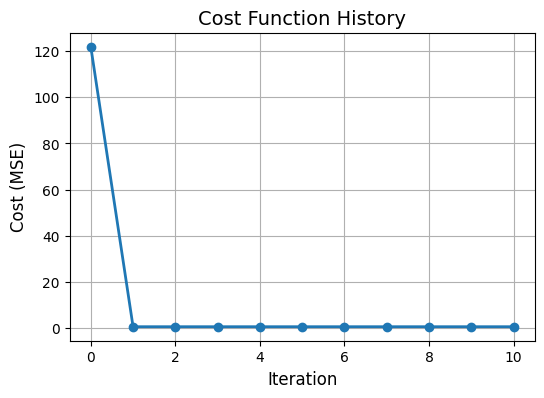

In [77]:
plt.figure(figsize=(6,4))
plt.plot(range(len(cost_history)), cost_history, 'o-', linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost (MSE)', fontsize=12)
plt.title('Cost Function History', fontsize=14)
plt.grid(True)
plt.show()


# 5.4 Solving the normal equations

$\frac{\partial}{\partial w}(a^Tw)=a$

# 5.8 The Least Absolute Deviations cost is convex

use triangular inequation |a+b| <= |a| + |b|